In [7]:
#!pip install --upgrade openpyxl
#!pip install --upgrade numexpr
#!pip install --upgrade numpy scikit-learn



In [8]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import minimize
from sklearn.preprocessing import MinMaxScaler

c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [9]:
file_path = "C:\\Users\\DELL\\Downloads\\Case_Study_Input_File.xlsx"
df = pd.read_excel(file_path, sheet_name="model_data")

In [10]:
# Exploratory Data Analysis (EDA)
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                48 non-null     datetime64[ns]
 1   kpi_val_sales_mn                    48 non-null     float64       
 2   vol_sales_mn                        48 non-null     float64       
 3   wtd_dist_max                        48 non-null     float64       
 4   num_dist_max                        48 non-null     float64       
 5   trade_promo_spends_mn               48 non-null     float64       
 6   consumer_promo_spends_mn            48 non-null     float64       
 7   newspaper_spends_mn                 48 non-null     float64       
 8   newspaper_impressions               48 non-null     int64         
 9   tv_total_grp                        48 non-null     float64       
 10  tv_spots      

In [11]:
# Missing values check
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
date                                  0
kpi_val_sales_mn                      0
vol_sales_mn                          0
wtd_dist_max                          0
num_dist_max                          0
trade_promo_spends_mn                 0
consumer_promo_spends_mn              0
newspaper_spends_mn                   0
newspaper_impressions                 0
tv_total_grp                          0
tv_spots                              0
tv_total_spends_mn                    0
competition1_newspaper_spends_mn      0
competition1_newspaper_impressions    0
competition1_tv_total_grp             0
competition1_tv_spots                 0
competition1_tv_total_spends_mn       0
competition2_newspaper_spends_mn      0
competition2_newspaper_impressions    0
competition2_tv_total_grp             0
competition2_tv_spots                 0
competition2_tv_total_spends_mn       0
google_display_clicks                 0
google_display_impressions_mn         0
google_display_spends_m

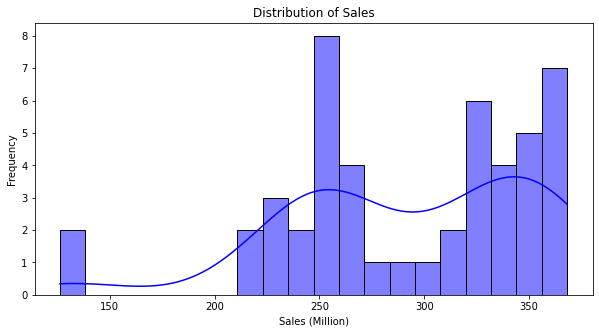

In [12]:
# Distribution of target variable
plt.figure(figsize=(10, 5))
sns.histplot(df["kpi_val_sales_mn"], bins=20, kde=True, color="blue")
plt.title("Distribution of Sales")
plt.xlabel("Sales (Million)")
plt.ylabel("Frequency")
plt.show()

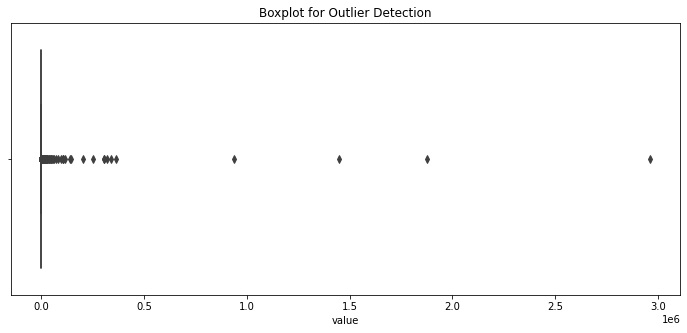

In [13]:
# Boxplot for outlier detection
import numpy as np
plt.figure(figsize=(12, 5))
sns.boxplot(data=df.select_dtypes(include=[np.number]).melt(), x="value")
plt.title("Boxplot for Outlier Detection")
plt.show()

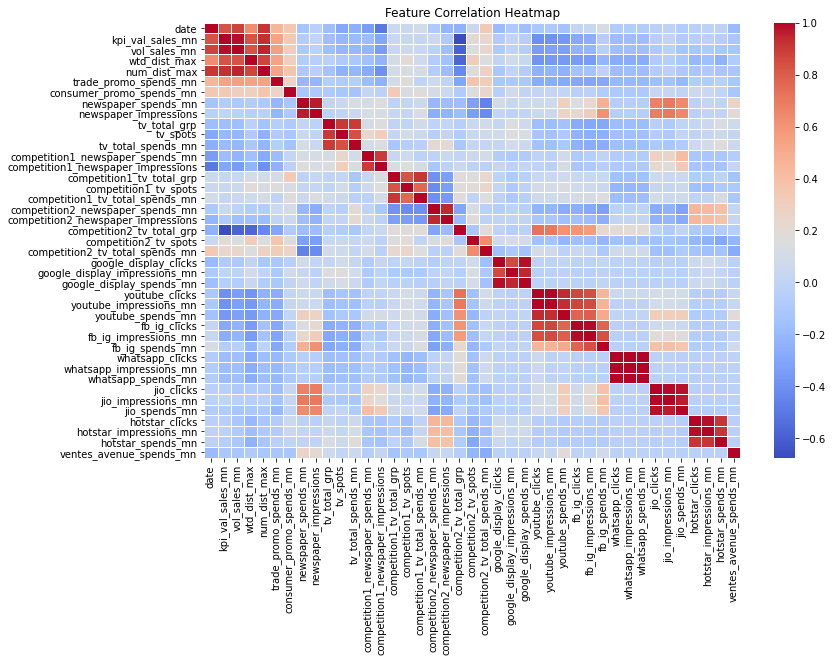

In [14]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
y = df["kpi_val_sales_mn"].values.reshape(-1, 1)


In [16]:
# Apply target transformation using MinMaxScaler
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y)

In [17]:
# Select independent variables (excluding date, target variable, and removed features)
X = df.drop(columns=["date", "kpi_val_sales_mn", "vol_sales_mn", "wtd_dist_max", "num_dist_max"], errors='ignore')

In [18]:
# Add constant for OLS regression
X = sm.add_constant(X)

In [19]:
# Fit the model with all features
model = sm.OLS(y_scaled, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     7.665
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           0.000108
Time:                        10:11:02   Log-Likelihood:                 70.681
No. Observations:                  48   AIC:                            -73.36
Df Residuals:                      14   BIC:                            -9.741
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [20]:
# Compute contributions: Coefficient * Mean Spend per Channel
contributions = model.params * X.mean()

In [21]:
# Compute ROI: Contribution / Mean Spend per Channel
roi = contributions / X.mean()


In [22]:
# Combine into a DataFrame
roi_df = pd.DataFrame({"Contribution": contributions, "ROI": roi}).sort_values(by="ROI", ascending=False)
print(roi_df)


                                    Contribution           ROI
const                               9.376760e-01  9.376760e-01
google_display_impressions_mn       1.366557e-02  1.119046e-01
hotstar_impressions_mn              4.055535e-02  6.037393e-02
newspaper_spends_mn                 8.114038e-02  4.694134e-02
fb_ig_spends_mn                     1.674880e-02  3.695131e-02
competition1_newspaper_spends_mn    1.060633e-01  2.354561e-02
fb_ig_impressions_mn                1.359204e-01  1.189294e-02
competition2_tv_total_spends_mn     2.559009e-01  9.355715e-03
youtube_spends_mn                   1.039101e-02  7.278765e-03
consumer_promo_spends_mn            3.645270e-02  7.221236e-03
competition1_tv_total_spends_mn     1.324817e-01  5.347650e-03
google_display_spends_mn            4.372005e-05  4.018695e-03
competition2_newspaper_impressions  5.953704e-02  6.411886e-04
competition1_tv_spots               8.148470e-02  3.463228e-05
youtube_clicks                      2.152482e-01  3.731

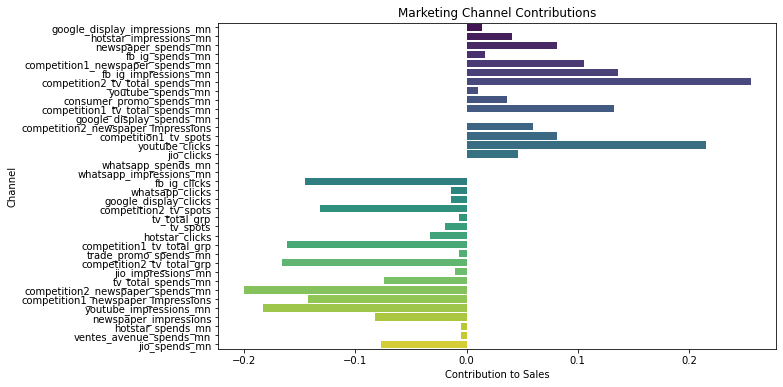

In [23]:
# Visualizing Contributions without 'const'
plt.figure(figsize=(10, 6))
sns.barplot(y=roi_df.index[1:], x=roi_df["Contribution"][1:], palette="viridis")  # Excluding 'const'
plt.title("Marketing Channel Contributions")
plt.xlabel("Contribution to Sales")
plt.ylabel("Channel")
plt.show()


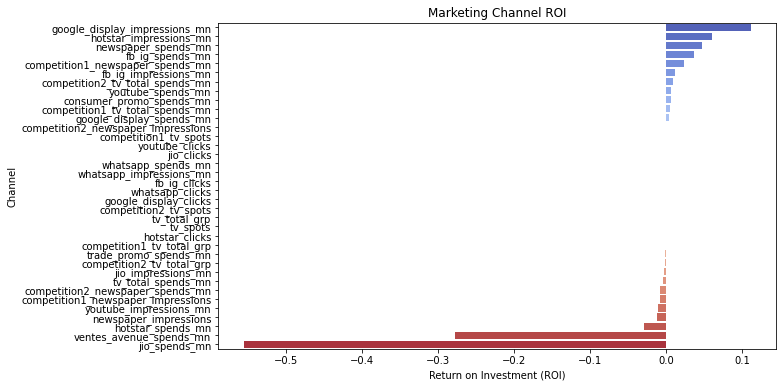

In [24]:
# Visualizing ROI
plt.figure(figsize=(10, 6))
sns.barplot(y=roi_df.index[1:], x=roi_df["ROI"][1:], palette="coolwarm")
plt.title("Marketing Channel ROI")
plt.xlabel("Return on Investment (ROI)")
plt.ylabel("Channel")
plt.show()

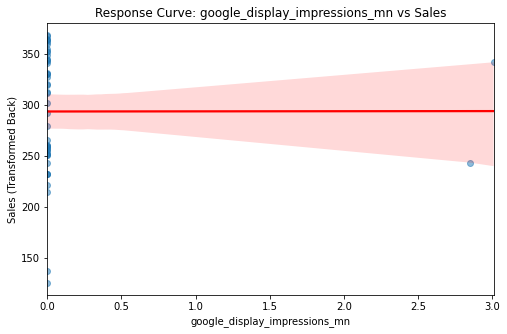

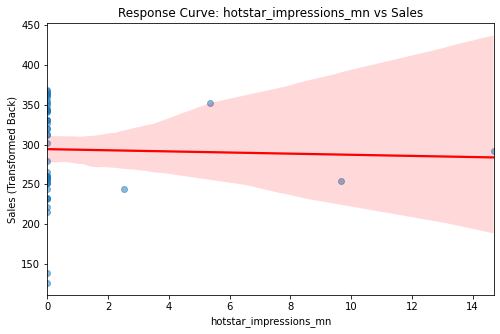

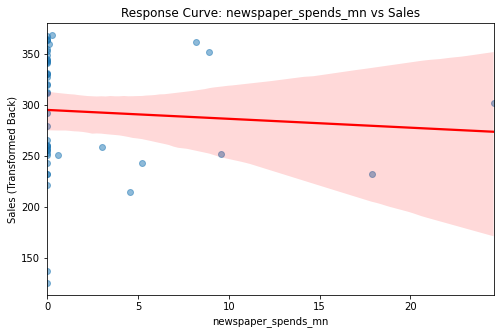

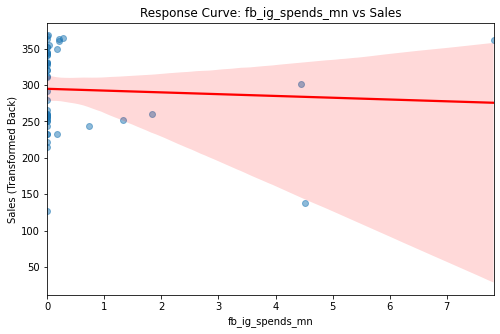

In [25]:
# Response Curves for Most Important Features
important_features = roi_df.index[:5]  # Select top 5 features by ROI
for feature in important_features:
    if feature != 'const':  # Ensure 'const' is not included
        plt.figure(figsize=(8, 5))
        sns.regplot(x=df[feature], y=scaler.inverse_transform(y_scaled).flatten(), scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
        plt.title(f"Response Curve: {feature} vs Sales")
        plt.xlabel(feature)
        plt.ylabel("Sales (Transformed Back)")
        plt.show()


In [28]:
# Budget Optimization Model for Top 5 Features
important_features = [f for f in important_features if f != 'const']
X_top5 = X[important_features]
   
def objective(budget_allocation):
    return -np.dot(model.params[important_features], budget_allocation)  # Maximize contribution (minimize negative)

constraints = ({'type': 'eq', 'fun': lambda budget_allocation: sum(budget_allocation) - X_top5.sum().sum()})  # Keep budget constant
bounds = [(0, None) for _ in range(len(X_top5.columns))]

initial_budget = X_top5.mean().values
opt_result = minimize(objective, initial_budget, bounds=bounds, constraints=constraints, method='SLSQP')

optimized_budget = opt_result.x

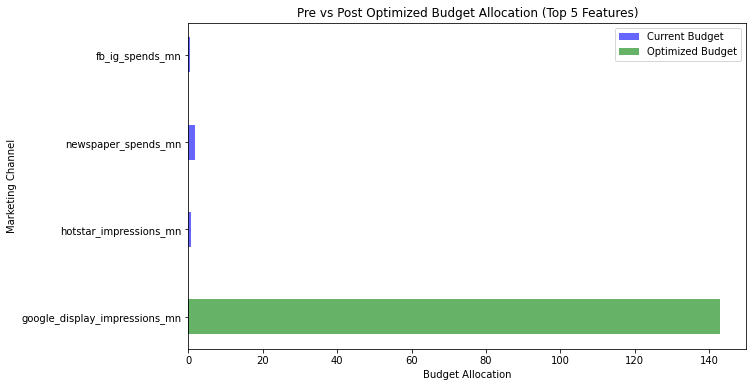

In [29]:
# Pre vs Post Optimized Budget Allocation
fig, ax1 = plt.subplots(figsize=(10, 6))
channels = X_top5.columns
width = 0.4  # Bar width

ax1.barh(channels, initial_budget, width, alpha=0.6, label='Current Budget', color='blue')
ax1.barh(channels, optimized_budget, width, alpha=0.6, label='Optimized Budget', color='green')
ax1.set_xlabel("Budget Allocation")
ax1.set_ylabel("Marketing Channel")
ax1.set_title("Pre vs Post Optimized Budget Allocation (Top 5 Features)")
ax1.legend()